In [1]:
#libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [2]:
# get data
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# data information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#%%
titanic[["Pclass", "Sex", "Cabin", "Embarked"]] = titanic[["Pclass", "Sex", "Cabin", "Embarked"]].astype("object")

In [6]:
# drop unnecessary column
titanic.drop('PassengerId', axis=1, inplace=True)

In [7]:
# describe data - get statistics
titanic.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


(5.0, 0.0)

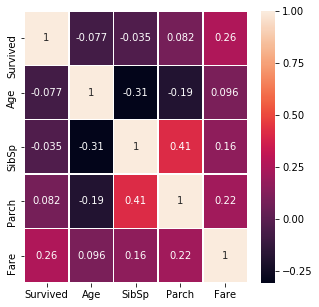

In [8]:
# correlation between numerical fields
plt.figure(figsize = (5,5))
ax = sns.heatmap(titanic.corr(), annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

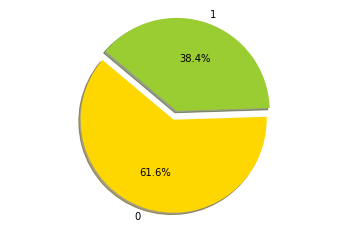

In [9]:
# pie chart for Survived distribution 
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(titanic["Survived"].value_counts(), explode=explode, labels=titanic["Survived"].unique(), colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

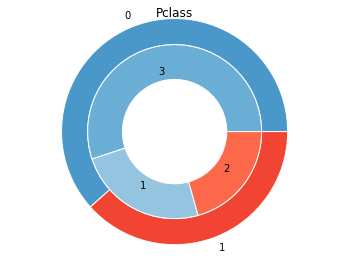

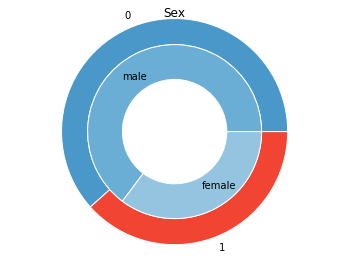

In [10]:
#pie plot for categorical feature distribution based on target field
# Create colors
######## for Embark and Cabin columns are not shown by pie chart because of NA values #########
cat =["Pclass", "Sex"]
for col in titanic.columns:
    if col in cat:
        a, b=[plt.cm.Blues, plt.cm.Reds]

        # First Ring (outside)
        fig, ax = plt.subplots()
        ax.axis('equal')
        mypie, _ = ax.pie(titanic.Survived.value_counts(), radius=1.3, labels=titanic.Survived.unique(), colors=[a(0.6), b(0.6)])
        plt.setp(mypie, width=0.3, edgecolor='white')

        # Second Ring (Inside)
        mypie2, _ = ax.pie(titanic[col].value_counts(), radius=1.3-0.3, labels=titanic[col].unique(), labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
        plt.setp(mypie2, width=0.4, edgecolor='white')
        plt.margins(0,0)
        plt.title('{}'.format(col))

        # show it
        plt.show()


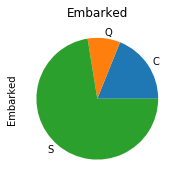

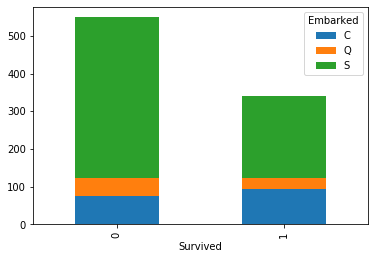

In [11]:
# explorate embark column
plt.subplot(1,2,1)
x_ = titanic.groupby(["Embarked"])["Embarked"].count()
x_.plot(kind='pie')
plt.title("Embarked")

stack_bar_embark = titanic.groupby(['Survived', 'Embarked'])['Survived'].count().unstack('Embarked').fillna(0)
stack_bar_embark[['C','Q', 'S']].plot(kind='bar', stacked=True)

----------------------------------------------------------------
Survived


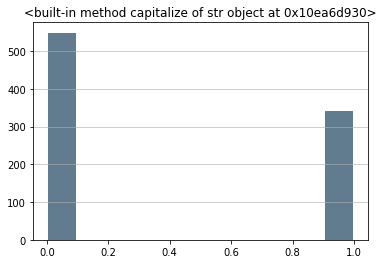

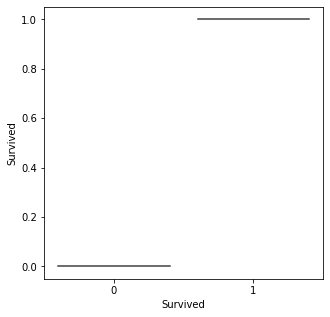

----------------------------------------------------------------
Age


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


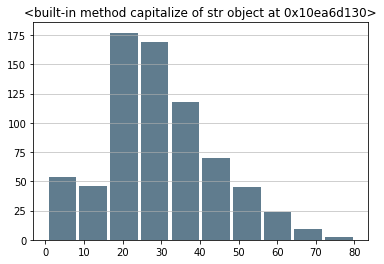

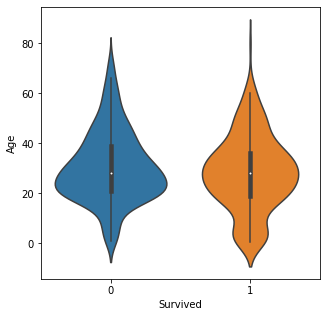

----------------------------------------------------------------
SibSp


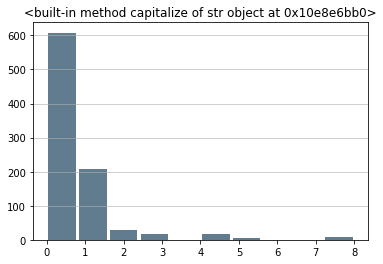

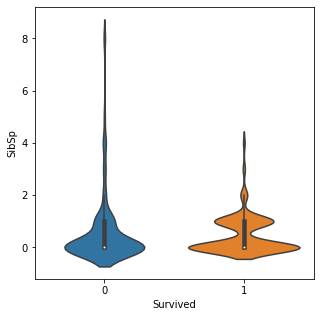

----------------------------------------------------------------
Parch


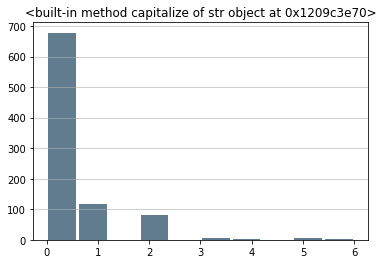

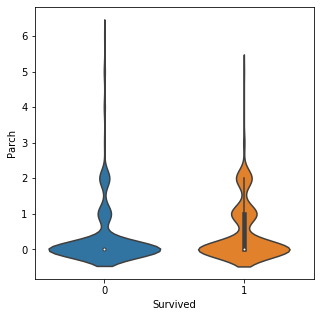

----------------------------------------------------------------
Fare


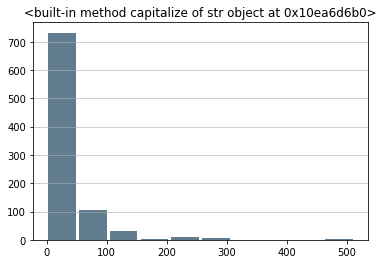

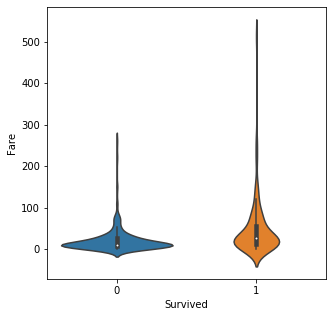

In [12]:
# plot for numerical data distribution base on target
for col in titanic.columns:
    if titanic[col].dtypes!="object":
        #histogram
        print("----------------------------------------------------------------")
        print("{}".format(col))
        plt.hist(titanic[col], bins=10, rwidth=0.9, color='#607c8e')
        plt.grid(axis='y', alpha=0.75)
        plt.title("{}".format(col).capitalize)
        plt.show()
        #violin plot based on target
        plt.figure(figsize=(5,5))
        sns.violinplot(x="Survived", y=titanic[col] ,data=titanic)
        plt.show()

In [13]:
# missing values counts
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
#fill NA for Embarked column based on most value
titanic['Embarked'] = titanic['Embarked'].fillna('S')

#fill NA for Age column based on quartile statistics
first_quartile = titanic['Age'].quantile(0.25)
last_quartile = titanic['Age'].quantile(0.75)
titanic['Age'] = titanic['Age'].fillna(np.random.randint(first_quartile, last_quartile))

In [15]:
# Cabin Column missing value evaluate
titanic.Cabin.value_counts()
titanic['Cabin'] = titanic['Cabin'].fillna('M')
titanic['Cabin'] = [i[0] for i in titanic['Cabin']]

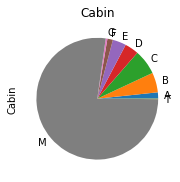

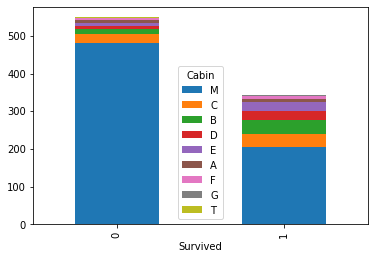

In [16]:
# explorate cabin column
plt.subplot(1,2,1)
x_ = titanic.groupby(["Cabin"])["Cabin"].count()
x_.plot(kind='pie')
plt.title("Cabin")

stack_bar_embark = titanic.groupby(['Survived', 'Cabin'])['Survived'].count().unstack('Cabin').fillna(0)
stack_bar_embark[["M","C","B","D","E","A","F","G","T"]].plot(kind='bar', stacked=True)

In [17]:
# Zscore transformation
num_col = titanic[["Age", "SibSp", "Parch", "Fare"]].copy()
num_col = num_col.apply(stats.zscore)

titanic_other = titanic[[col for col in titanic if col not in num_col]].copy()
titanic_zscore = pd.concat([titanic_other, num_col], axis=1)

In [18]:
# create feature Fare Group and Age group
titanic["Fare_Group"] = np.where(titanic["Fare"] < titanic["Fare"].quantile(0.25), 0,
                                 np.where(titanic["Fare"] < titanic["Fare"].mean(), 1, 
                                         np.where(titanic["Fare"] < titanic["Fare"].quantile(0.75), 2, 3)))

titanic["Age_Group"] = np.where(titanic["Age"] < titanic["Age"].quantile(0.25), 0,
                                 np.where(titanic["Age"] < titanic["Age"].mean(), 1, 
                                         np.where(titanic["Age"] < titanic["Age"].quantile(0.75), 2, 3)))
titanic[['Fare_Group', "Age_Group"]] = titanic[['Fare_Group', "Age_Group"]].astype("object")    

In [19]:
#create feature zscore transformed data
titanic_zscore["Fare_Group"] = np.where(titanic_zscore["Fare"] < titanic_zscore["Fare"].quantile(0.25), 0,
                                 np.where(titanic_zscore["Fare"] < titanic_zscore["Fare"].mean(), 1, 
                                         np.where(titanic_zscore["Fare"] < titanic_zscore["Fare"].quantile(0.75), 2, 3)))

titanic_zscore["Age_Group"] = np.where(titanic_zscore["Age"] < titanic_zscore["Age"].quantile(0.25), 0,
                                 np.where(titanic_zscore["Age"] < titanic_zscore["Age"].mean(), 1, 
                                         np.where(titanic_zscore["Age"] < titanic_zscore["Age"].quantile(0.75), 2, 3)))
titanic_zscore[['Fare_Group', "Age_Group"]] = titanic_zscore[['Fare_Group', "Age_Group"]].astype("object") 

In [20]:
#create new feature from Name
titanic['Title'] = np.where(titanic["Name"].str.contains("Mr"), "Mr", 
                           np.where(titanic["Name"].str.contains("Mrs"), "Mrs",
                                   np.where(titanic["Name"].str.contains("Miss"), "Miss",
                                           np.where(titanic["Name"].str.contains("Master"), "Master", 
                                                    np.where(titanic["Name"].str.contains("Dr"), "Dr", "Title")))))
titanic.drop("Name", axis=1, inplace=True)

In [21]:
#create new feature from Name for z transformed data
titanic_zscore['Title'] = np.where(titanic_zscore["Name"].str.contains("Mr"), "Mr", 
                           np.where(titanic_zscore["Name"].str.contains("Mrs"), "Mrs",
                                   np.where(titanic_zscore["Name"].str.contains("Miss"), "Miss",
                                           np.where(titanic_zscore["Name"].str.contains("Master"), "Master", 
                                                    np.where(titanic_zscore["Name"].str.contains("Dr"), "Dr", "Title")))))
titanic_zscore.drop("Name", axis=1, inplace=True)

In [22]:

titanic["Fare_groupby_Pclass_Cabin"] = titanic.groupby(["Pclass", "Cabin"])['Fare'].transform("mean")
titanic["Age_groupby_Pclass_Cabin"] = titanic.groupby(["Pclass", "Cabin"])['Age'].transform("mean")
titanic["Fare_groupby_Sex_Embark"] = titanic.groupby(["Sex", "Embarked"])['Fare'].transform("mean")
titanic["Count_Sex_by_Cabin_and_Embark"] = titanic.groupby(["Cabin", "Embarked"])['Sex'].transform("count")

In [23]:
titanic_zscore["Fare_groupby_Pclass_Cabin"] = titanic_zscore.groupby(["Pclass", "Cabin"])['Fare'].transform("mean")
titanic_zscore["Age_groupby_Pclass_Cabin"] = titanic_zscore.groupby(["Pclass", "Cabin"])['Age'].transform("mean")
titanic_zscore["Fare_groupby_Sex_Embark"] = titanic_zscore.groupby(["Sex", "Embarked"])['Fare'].transform("mean")

(9.0, 0.0)

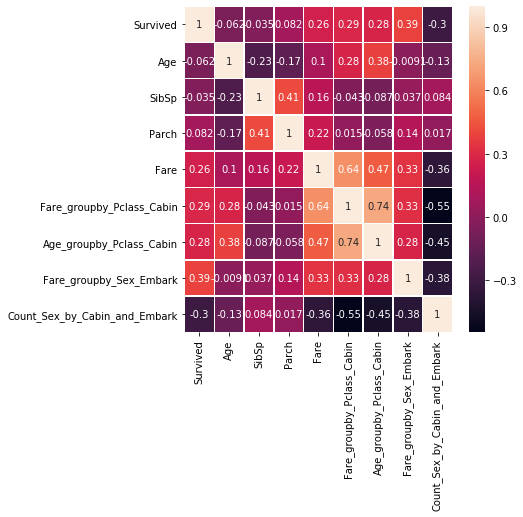

In [24]:
# correlation between numerical fields
plt.figure(figsize = (6,6))
ax = sns.heatmap(titanic.corr(), annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(8.0, 0.0)

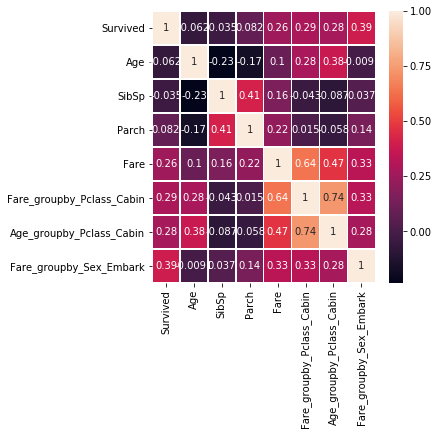

In [25]:
# correlation between numerical fields
plt.figure(figsize = (5,5))
ax = sns.heatmap(titanic_zscore.corr(), annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [26]:
#label encoding
cat = ["Pclass", "Sex", "Ticket", "Cabin", "Embarked", "Fare_Group", "Age_Group", "Title"]

le = LabelEncoder()
titanic[cat] = titanic[cat].apply(lambda col: le.fit_transform(col))
titanic_zscore[cat] = titanic_zscore[cat].apply(lambda col: le.fit_transform(col))


In [27]:
#train test split 
x = titanic.drop("Survived", axis=1)
y = titanic[["Survived"]].copy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_z = titanic_zscore.drop("Survived", axis=1)
y_z = titanic_zscore[["Survived"]].copy()
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(x_z, y_z, test_size=0.25, random_state=64)


In [57]:
#parameter tuning
xgb = XGBClassifier(
    objective= 'binary:logistic',
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(100, 1000, 100),
    'learning_rate': [0.1, 0.01, 0.05, 0.3],
     "gamma"  : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
}

In [69]:
# grid search cv
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [59]:
#model fit xgb
xgb_grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   33.7s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  4.7min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  7.0min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  9.7min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed: 12.4min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed: 16.1min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed: 20.8min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed: 25.4min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed: 31.3min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed: 36.3min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed: 41.6min
[Parallel(n_jobs=10)]: Done 11230 tasks      

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=10,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.1, 0.01, 0.05, 0.3],
                         'max_depth': range

In [63]:
# take best parameter
xgb_grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [65]:
# model fit with best parameters
model_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [73]:
# test train predictions
print("XGB TEST DATA PREDICTIONS")
print("------------------------------------------------------")
xgb_predict_test = model_xgb.predict(X_test)
print(confusion_matrix(y_test, xgb_predict_test))
print(classification_report(y_test, xgb_predict_test))
print(accuracy_score(y_test, xgb_predict_test))

print("XGB TRAIN DATA PREDICTIONS")
print("------------------------------------------------------")
xgb_predict_train = model_xgb.predict(X_train)
print(confusion_matrix(y_train, xgb_predict_train))
print(classification_report(y_train, xgb_predict_train))
print(accuracy_score(y_train, xgb_predict_train))

XGB TEST DATA PREDICTIONS
------------------------------------------------------
[[122  12]
 [ 26  63]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       134
           1       0.84      0.71      0.77        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223

0.8295964125560538
XGB TRAIN DATA PREDICTIONS
------------------------------------------------------
[[398  17]
 [ 51 202]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       415
           1       0.92      0.80      0.86       253

    accuracy                           0.90       668
   macro avg       0.90      0.88      0.89       668
weighted avg       0.90      0.90      0.90       668

0.8982035928143712


In [71]:
#model fit xgb for z transormed fata
xgb_grid_search.fit(X_train_z, y_train_z)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   31.5s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  4.4min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  6.6min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  9.2min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed: 11.7min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed: 15.0min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed: 18.9min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed: 22.7min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed: 27.4min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed: 32.0min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed: 37.1min
[Parallel(n_jobs=10)]: Done 11230 tasks      

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=10,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.1, 0.01, 0.05, 0.3],
                         'max_depth': range

In [75]:
#take best parameter
xgb_grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [76]:
# model fit with best parameters
model_xgb_z = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)
model_xgb_z.fit(X_train_z, y_train_z)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [77]:
# test train predictions z transformed data
print("XGB TEST DATA PREDICTIONS")
print("------------------------------------------------------")
xgb_predict_test_z = model_xgb_z.predict(X_test_z)
print(confusion_matrix(y_test_z, xgb_predict_test_z))
print(classification_report(y_test_z, xgb_predict_test_z))
print(accuracy_score(y_test_z, xgb_predict_test_z))

print("XGB TRAIN DATA PREDICTIONS")
print("------------------------------------------------------")
xgb_predict_train_z = model_xgb_z.predict(X_train_z)
print(confusion_matrix(y_train_z, xgb_predict_train_z))
print(classification_report(y_train_z, xgb_predict_train_z))
print(accuracy_score(y_train_z, xgb_predict_train_z))

XGB TEST DATA PREDICTIONS
------------------------------------------------------
[[126  11]
 [ 24  62]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       137
           1       0.85      0.72      0.78        86

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223

0.8430493273542601
XGB TRAIN DATA PREDICTIONS
------------------------------------------------------
[[384  28]
 [ 70 186]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       412
           1       0.87      0.73      0.79       256

    accuracy                           0.85       668
   macro avg       0.86      0.83      0.84       668
weighted avg       0.85      0.85      0.85       668

0.8532934131736527


###### z transformed data results are better than other. beacuse test and train predictions are so close.It is imbalanced data. 0 values are almost twice of 1 values. Recall results can be bias. It can be applied oversampling to increase accuracy